# Домашнее задание №4

Это домашнее задание можно выполнять целиком в этом ноутбуке, либо алгоритмы написать в отдельном файле и импортировать сюда, для использования. В папке data лежат два файла islands.fasta и nonIslands.fasta. В них хранятся прочтения из CpG островков и из обычных участков генома соответственно, этими данными нужно будет воспользоваться в первом задании.

In [100]:
from collections import defaultdict
from tabulate import tabulate
from typing import Callable, List, Iterator, Dict, Tuple


ALPHABET = "ACGT"

Прочитаем данные

In [101]:
from Bio import SeqIO


def read_dataset(filename: str) -> List[str]:
    records = list(SeqIO.parse(filename, 'fasta'))
    return [str(record.seq) for record in records]


islands_dataset = read_dataset('data/islands.fasta')
noninslands_dataset = read_dataset('data/nonIslands.fasta')


## Задача №1 (1)
Определите частоты генерации для каждого из нуклеотидов внутри CpG островков и вне их. Посчитайте так-же частоты для всех упорядоченных пар нуклеотидов и сравните частоту пары CG внутри островков и снаружи. Сделайте вывод. 

In [102]:
def calculate_frequencies(genomes: List[str], key_getter: Callable):
    result = defaultdict(int)
    for genome in genomes:
        for j in range(len(genome)):
            key = key_getter(genome, j)
            if key is not None:
                result[key] += 1
    return result

def single_key_getter(genome: str, index: int):
    return genome[index]

def pairs_key_getter(genome: str, index: int):
    return (genome[index], genome[index + 1]) if index + 1 < len(genome) else None

def add_start_token(genome: str):
    return f"#{genome}"


islands_single_frequencies = calculate_frequencies(islands_dataset, single_key_getter)
islands_pairs_frequencies = calculate_frequencies(list(map(add_start_token, islands_dataset)), pairs_key_getter)
nonislands_single_frequencies = calculate_frequencies(noninslands_dataset, single_key_getter)
nonislands_pairs_frequencies = calculate_frequencies(list(map(add_start_token, noninslands_dataset)), pairs_key_getter)


Посчитаем частоты одиночных символов

In [103]:
def print_seq(frequencies: defaultdict):
    table = [[letter, frequencies[letter]] for letter in ALPHABET]
    print(tabulate(table))


print("Islands dataset frequency sequence")
print_seq(islands_single_frequencies)
print()

print("Nonislands dataset frequency sequence")
print_seq(nonislands_single_frequencies)
print()


Islands dataset frequency sequence
-  -------
A   740202
C  1083626
G  1090500
T   741672
-  -------

Nonislands dataset frequency sequence
-  -----
A  61445
C  41658
G  42149
T  67141
-  -----



Посчитаем частоты пар символов

In [104]:
def print_matrix(frequencies: defaultdict):
    table = [[letter for letter in (" " + ALPHABET)]]
    table += [
        [letter_1] + [frequencies[letter_1, letter_2] for letter_2 in ALPHABET]
        for letter_1 in ("#" + ALPHABET)
    ]
    print(tabulate(table))


print("Islands dataset frequency matrix")
print_matrix(islands_pairs_frequencies)
print()

print("Nonislands dataset frequency sequence")
print_matrix(nonislands_pairs_frequencies)
print()


Islands dataset frequency matrix
-  ------  ------  ------  ------
   A       C       G       T
#  475     472     465     416
A  187137  167700  262824  122114
C  229823  375624  215537  262183
G  218792  322299  378421  170499
T  103975  217531  233253  186460
-  ------  ------  ------  ------

Nonislands dataset frequency sequence
-  -----  -----  -----  -----
   A      C      G      T
#  0      1      0      0
A  19089  10010  14908  17437
C  14482  10623  1121   15432
G  12793  7270   10644  11442
T  15081  13754  15476  22830
-  -----  -----  -----  -----



Посчитаем вероятности одиночных символов

In [105]:
def frequencies_to_probability_seq(source: Dict[str, int]) -> Dict[str, float]:
    total = 0
    for k, v in source.items():
        total += v
    res = defaultdict(int, {k: round(v / total, 4) for k, v in source.items()})
    return res


islands_single_probabilities = frequencies_to_probability_seq(islands_single_frequencies)
nonislands_single_probabilities = frequencies_to_probability_seq(nonislands_single_frequencies)

print("Islands dataset probability sequence")
print_seq(islands_single_probabilities)
print()

print("Nonislands dataset probability sequence")
print_seq(nonislands_single_probabilities)
print()


Islands dataset probability sequence
-  ------
A  0.2025
C  0.2964
G  0.2983
T  0.2029
-  ------

Nonislands dataset probability sequence
-  ------
A  0.2893
C  0.1961
G  0.1984
T  0.3161
-  ------



Посчитаем вероятности пар символов

In [106]:
def frequencies_to_probability_matrix(source: Dict[str, int]) -> Dict[Tuple[str, str], float]:
    total = defaultdict(int)
    for k, v in source.items():
        total[k[0]] += v
    res = defaultdict(int, {(k[0], k[1]): round(v / total[k[0]], 4) for k, v in source.items()})
    return res


islands_pairs_probabilities = frequencies_to_probability_matrix(islands_pairs_frequencies)
nonislands_pairs_probabilities = frequencies_to_probability_matrix(nonislands_pairs_frequencies)

print("Islands dataset probability matrix")
print_matrix(islands_pairs_probabilities)
print()

print("Nonislands dataset probability matrix")
print_matrix(nonislands_pairs_probabilities)
print()

print("P(CG|inside islands) =", islands_pairs_probabilities["C", "G"])
print("P(CG|outside islands) =", nonislands_pairs_probabilities["C", "G"])


Islands dataset probability matrix
-  ------  ------  ------  ------
   A       C       G       T
#  0.2598  0.2582  0.2544  0.2276
A  0.253   0.2267  0.3553  0.1651
C  0.2122  0.3468  0.199   0.2421
G  0.2007  0.2957  0.3472  0.1564
T  0.1403  0.2935  0.3147  0.2516
-  ------  ------  ------  ------

Nonislands dataset probability matrix
-  ------  ------  ------  ------
   A       C       G       T
#  0.0     1.0     0.0     0.0
A  0.3107  0.1629  0.2426  0.2838
C  0.3476  0.255   0.0269  0.3704
G  0.3035  0.1725  0.2525  0.2715
T  0.2246  0.2049  0.2305  0.34
-  ------  ------  ------  ------

P(CG|inside islands) = 0.199
P(CG|outside islands) = 0.0269


Вероятность CG пары внутри CpG островка значительно выше

## Задача №2 (2)
Напишите марковскую модель, которая имеет открытые состояния {A, T, G, C}, и скрытые состояния {+, -}. Когда модель в состоянии **+**, то вероятность генерации некоторого символа нуклеотида соответствует его частоте внутри CpG островков, вычислиному в первом задании, если состояние **-**, то частоте вне островков. Вероятность остаться внутри островка 0.95, а перейти в обычный геном 0.05. Для остальной части генома соответствующие вероятности 0.995 и 0.005. Саму модель можно реализовать в виде итератора, определив метод next, который возвращает пару - состояние и нуклеотид, который в этом состоянии произведен.    
Воспользуйтесь данной моделью для того чтобы сгенерировать набор из 20 последовательностей длинной от 1 000 до 100 000, причем к каждой последовательности должна прилагаться последовательность состояний.

Определим матрицу перехода

In [107]:
FROM_ISLAND_PROBABILITY = 0.05
TO_ISLAND_PROBABILITY = 0.005

HIDDEN_STATE_PROB_MATRIX = {
    (True, True): 1 - FROM_ISLAND_PROBABILITY,
    (True, False): FROM_ISLAND_PROBABILITY,
    (False, True): TO_ISLAND_PROBABILITY,
    (False, False): 1 - TO_ISLAND_PROBABILITY
}

Создадим словарь вероятности появления каждого символа в каждом скрытом состоянии

In [108]:
common_single_probabilities: Dict[Tuple[bool, str], float] = defaultdict(float)
for k, v in islands_single_probabilities.items():
    common_single_probabilities[True, k] = v
for k, v in nonislands_single_probabilities.items():
    common_single_probabilities[False, k] = v

print(common_single_probabilities.items())


dict_items([((True, 'C'), 0.2964), ((True, 'A'), 0.2025), ((True, 'T'), 0.2029), ((True, 'G'), 0.2983), ((False, 'C'), 0.1961), ((False, 'T'), 0.3161), ((False, 'G'), 0.1984), ((False, 'A'), 0.2893)])


Класс модели

In [109]:
from dataclasses import dataclass
from random import choices


@dataclass
class ModelEdge:
    dest: _
    probability: float


@dataclass(repr=True)
class ModelNodeState:
    is_island: bool
    letter: str


class ModelNode:
    def __init__(self, is_island: bool, letter: str):
        self.state = ModelNodeState(is_island, letter)
        self.edges: List[ModelEdge] = []

    def add_edge(self, dest, prob: float):
        self.edges.append(ModelEdge(dest, prob))

    def __next__(self):
        res = choices(
            population=[e.dest for e in self.edges],
            weights=[e.probability for e in self.edges]
        )
        return res[0]


START_FAKE_STATE = False, "#"


class Model(Iterator):
    def __init__(self, length: int,
                 common_single_probabilities: Dict[Tuple[bool, str], float],
                 hidden_state_prob_matrix):
        self.states: Dict[Tuple[bool, str], ModelNode] = {}

        all_keys = list(common_single_probabilities.keys())
        for state, letter in all_keys + [START_FAKE_STATE]:
            self.states[state, letter] = ModelNode(state, letter)

        for from_state, from_letter in all_keys + [START_FAKE_STATE]:
            for to_state, to_letter in all_keys:
                self.states[from_state, from_letter].add_edge(
                    self.states[to_state, to_letter],
                    hidden_state_prob_matrix[from_state, to_state] * common_single_probabilities[to_state, to_letter]
                )

        self.state = self.states[START_FAKE_STATE]
        self.current_length = 0
        self.max_length = length

    def __iter__(self):
        return self

    def __next__(self) -> Tuple[str, str]:
        if self.current_length >= self.max_length:
            raise StopIteration()
        self.current_length += 1
        self.state = self.state.__next__()
        return self.state.state


Создадим тестовых примеров фиксированной длины

In [110]:
model_test_genomes = []
for _ in range(100):
    model_test_genome = []
    for i, x in enumerate(Model(200, common_single_probabilities, HIDDEN_STATE_PROB_MATRIX)):
        model_test_genome.append(x)
    model_test_genomes.append(model_test_genome)

test_genomes = []
for model_test_genome in model_test_genomes:
    str_test = "".join(map(lambda x: x.letter, model_test_genome))
    test_genomes.append((str_test, model_test_genome))

print("Test examples")
print()
for str_test_genome, _ in test_genomes:
    print(str_test_genome)
    print()


Test examples

TGAATAATTTACGGGAACATTTTAACCAAGGGTTACAATAGGCTCTGACCTCAGTGTCAATACCGTGCAACGCGGGAAGTCATTCATAGGCGCCAGCAACAAAAATTATATGCCTGTAGTCTTTATTACGCACACACTATTTCTGGAATTATCTCTTTTGGGTTGGCGTGGGAGAGCAATCGTGAACTTTTAAGTGAACT

GGGAAATGAAACCGTTTACGACCGGACTACGACAGTCATCGCAAGTCACGGTCCGGGAGTTCAGATATTCAATGTCGCATGCGCAATTGTGTAAGGGTTATCTAGTTTTTTCGTAGGATTAGTTTATGCAATCTCTCCTACCTTAACTCAGTGATAGTTGCCGAAAAATTGGTTGACTCTAAAATGTAAGCTATCTTAAT

GATTTTAGCTGGTATCGCGTCGTAACGGAAGGGAGTTGCCCACTACCTAGCCGTTTACATACCGGTAGCAGTCGCTTGGTTTCGGCAGAGGCGTAGTACGCTCAATACAGAGATAAAAAATCTGGACTTACTAAATATTGCTAACCTGATCCATGCAGTATCTAGTTTCAGTTTGGTCCGACACTCCTAGCCAAGGAGTG

AGATTGGGAGGAAGTAGATTGTGTATTAAAATCCGGAATCGTGGGCGCGTGAGAGCAAAAGTCGGCACAGTGCGTAGAACGGGAACTCGCAACCTGGAAGCCGAGCACTCCATTGAGCGGGGTCGGTAAATCTCAATTGCATGTAGATTATATTTAAGATTTGCCGTAGCACGCCGTAGCAAATACTGCACTATTTTTAT

GGATCTTTATATTAAAACGTAAAGTGATAGCTTCAATAACAAACGATTAGGCCCGTTTCACGTGCTCTATATTGGCCGAGCCGTATTACATGATCTCGCATGTCCGTACCTAAATCCTAAATAAAGCATATCTTTTGCCTATGTTAGGCCTATTTCATCTTTTACAGACACACAGAT

## Задача №3 (4)
Напишите алгоритм Витерби для восстановления последовательности скрытых состояний марковской модели из второго задаания. Воспользуйтесь им, воссстановив состояния тех последовательностей, которые вы получили во втором задании и посчитайте TP, TN, FP, FN по количеству правильно или ошибочно предсказанных позиций из CpG остравков.

Класс-матрица для инкапсулирования TP, TN, FP, FN.
А также подсчет матрицы через массив предсказанных и правильных состояний

In [111]:
class Table:
    def __init__(self, matrix = None):
        self.matrix = matrix or [[0, 0], [0, 0]]

    def __add__(self, other):
        return Table([[self.matrix[i][j] + other.matrix[i][j] for j in range(2)] for i in range(2)])

    def inc(self, pred, real):
        self.matrix[int(pred)][int(real)] += 1

    def accuracy(self):
        right = self.matrix[0][0] + self.matrix[1][1]
        wrong = self.matrix[0][1] + self.matrix[1][0]
        total = right + wrong
        return right / total

    def __str__(self):
        return f"Test_Result: " \
               f"correct={round(self.accuracy(), 4)}, " \
               f"TP={self.matrix[1][1]}, TN={self.matrix[0][0]}, FP={self.matrix[1][0]}, FN={self.matrix[0][1]}"


def test_solution(predict: Callable):
    result = Table()
    for str_test_genome, model_test_genome in test_genomes:
        prediction = predict(str_test_genome)
        for p_symbol, m_symbol in zip(prediction, model_test_genome):
            result.inc(p_symbol, m_symbol.is_island)
    return result


Алгоритм Витерби и его тестирование

In [112]:
import math


def viterbi(genome: str) -> List[bool]:
    n = len(genome)
    dp = [[0.0, 0.0] for _ in range(n + 1)]
    parent = [[0, 0] for _ in range(n + 1)]
    dp[0] = [0.0, -1e9]
    for i, c in enumerate(genome):
        for l in [0, 1]:
            max_prob, max_parent = max([(dp[i][k] + math.log2(HIDDEN_STATE_PROB_MATRIX[bool(k), bool(l)]), k) for k in [0, 1]])
            dp[i + 1][l] = math.log2(common_single_probabilities[bool(l), c]) + max_prob
            parent[i + 1][l] = max_parent

    final_prob, final_state = max([(dp[n][k] + math.log2(HIDDEN_STATE_PROB_MATRIX[bool(k), bool(0)]), k) for k in [0, 1]])
    res = [False] * n
    current_state = final_state
    for i in range(len(genome), 0, -1):
        res[i - 1] = bool(current_state)
        current_state = parent[i][current_state]
    return res


print("Viterbi matrix")
viterbi_result = test_solution(viterbi)
print(viterbi_result)


Viterbi matrix
Test_Result: correct=0.9023, TP=5, TN=18042, FP=54, FN=1899


## Задача №4 (4)
Напишите алгоритм вперед назад для модели из второго задания. Пользуясь этим алгоритмом найдите вероятности того, что модель находилась в состоянии **+** для каждой позиции строк из второго задания. Устанавливая различные пороговые значения, определите позиции соответствующие CpG островкам и посчитайте TP. Постройте график зависимости TP от выбранного порогового значения. Есть ли пороговые значения при которых TP больше чем в задании №3?

Алгоритм Forward-backward и его тестирование

In [113]:
def forward_backward_proba(genome: str):
    n = len(genome)
    f = [[0.0, 0.0] for _ in range(n + 1)]
    f[0][0] = 1.0
    for i, c in enumerate(genome):
        for l in [0, 1]:
            f[i + 1][l] = common_single_probabilities[bool(l), c] * \
                          sum(f[i][k] * HIDDEN_STATE_PROB_MATRIX[bool(k), bool(l)] for k in [0, 1])

    b = [[0.0, 0.0] for _ in range(n + 1)]
    for l in [0, 1]:
        b[n][l] = HIDDEN_STATE_PROB_MATRIX[bool(l), False]
    for i, c in reversed(list(enumerate(genome))):
        for k in [0, 1]:
            b[i][k] = sum(HIDDEN_STATE_PROB_MATRIX[bool(k), bool(l)] * \
                          common_single_probabilities[bool(l), c] * b[i + 1][l] for l in [0, 1])

    p = b[0][0]

    res = [f[i][1] * b[i][1] / p for i in range(1, n + 1)]
    return res

def forward_backward(genome: str, threshold: float):
    return [p >= threshold for p in forward_backward_proba(genome)]

for t in range(5, 56, 10):
    threshold = t / 100
    print("Forward backward with threshold", threshold)
    forbackward_result = test_solution(lambda s: forward_backward(s, threshold))
    print(forbackward_result)
    print()


Forward backward with threshold 0.05
Test_Result: correct=0.7093, TP=1509, TN=12676, FP=5420, FN=395

Forward backward with threshold 0.15
Test_Result: correct=0.8597, TP=1181, TN=16012, FP=2084, FN=723

Forward backward with threshold 0.25
Test_Result: correct=0.893, TP=933, TN=16927, FP=1169, FN=971

Forward backward with threshold 0.35
Test_Result: correct=0.9122, TP=793, TN=17450, FP=646, FN=1111

Forward backward with threshold 0.45
Test_Result: correct=0.9181, TP=620, TN=17741, FP=355, FN=1284

Forward backward with threshold 0.55
Test_Result: correct=0.9157, TP=482, TN=17833, FP=263, FN=1422



Сравнение методов

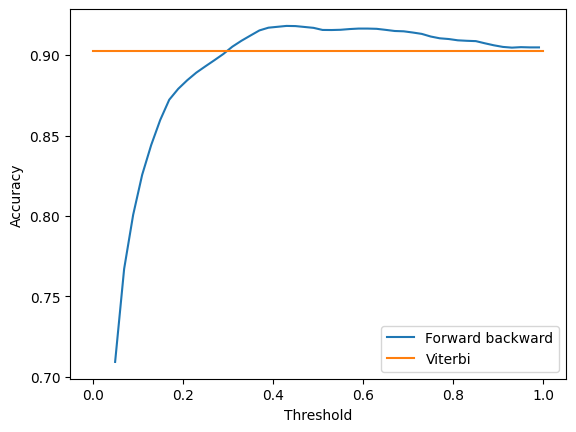

In [114]:
import matplotlib.pyplot as plt

fb_xs = [t / 100 for t in range(5, 101, 2)]
fb_ys = [test_solution(lambda s: forward_backward(s, threshold)).accuracy() for threshold in fb_xs]

v_xs = [0, 1]
v_ys = [test_solution(viterbi).accuracy()] * 2

plt.plot(fb_xs, fb_ys)
plt.plot(v_xs, v_ys)
plt.ylabel("Accuracy")
plt.xlabel("Threshold")
plt.legend(["Forward backward", "Viterbi"])
plt.show()


Алгоритм Forward-backward оказывается лучше алгоритма Витерби при значениях $threshold \geq 0.25$